<a href="https://colab.research.google.com/github/williambrunos/Introduction-To-ML/blob/main/Class_1/Class_1_2/Oficina/Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regressão Linear Múltipla

Neste notebook aprenderemos como utilizar a biblioteca scikit-learn para construirmos um modelo de previsão de preço, usando regressão linear múltipla. Para isso utilizaremos um conjunto de dados de carros usados listados pelo site www.cardekho.com e disponível em: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho e adaptado neste notebook.

As informações contidas no dataset são:

**nome_carro:**        nome do carro

**ano:**               ano de fabricação

**preco_venda:**       preço que o dono quer vender

**preco_atual:**       preço da concessionária

**kms_rodados:**       kilometragem do carro 

**tipo_combustivel:**  tipo de combustível do carro (Diesel, Gasolina, GasNatural)

**tipo_vendedor:**     se o vendedor é um revendedor ou é a própria pessoa

**tipo_transmissao:**  tipo de câmbio do carro

**n_donos:**           número de donos que o carro já teve

### Importando bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Carregando os dados

OBSERVAÇÃO: Professora, tive que adaptar as célular de leitura do dataframe para o google drive pois utilizo o google colab. Por favor, reescreva o caminho do arquivo em csv localizado na sua máquina e rode as células normalmente, agradeço :)

In [3]:
# Não execute esta célula se estiver no jupyter
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/Carros/car_data.csv")

# mostrando as primeiras linhas do arquivo.
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,Gasolina,Revendedor,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Revendedor,Manual,0
2,ciaz,2017,7.25,9.85,6900,Gasolina,Revendedor,Manual,0
3,wagon r,2011,2.85,4.15,5200,Gasolina,Revendedor,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Revendedor,Manual,0


Tamanho dos nossos registros: 301 observações (carros) e 9 características (features)

In [5]:
# o nosso dataset possui 301 registros de carros usados
print(df.shape)

(301, 9)


Para o algoritmo de regressão, vamos substituir os dados que possuem textos por números. 

**NOVA DOCUMENTAÇÃO** :

tipo_transmissão: 0 para Manual e 1 para Automático
tipo_vendedor: 0 para Revendedor e 1 para Individual
tipo_combustivel: 0 para Gasolina e 1 para Gás Natural

In [9]:
df['tipo_transmissao'].replace({'Manual': 0, 'Automatico': 1}, inplace=True)
df['tipo_vendedor'].replace({'Revendedor': 0, 'Individual': 1}, inplace=True)
df['tipo_combustivel'].replace({'Gasolina': 0, 'Diesel': 1, 'GasNatural': 2}, inplace=True)
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Vamos plotar em um gráfico os anos do carros versus o preço de venda

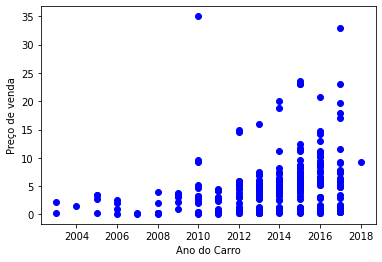

In [6]:
plt.scatter(df['ano'], df['preco_venda'],  color='blue')
plt.xlabel("Ano do Carro")
plt.ylabel("Preço de venda")
plt.show()

Agora vamos ver qual os anos dos carros que mais rodaram

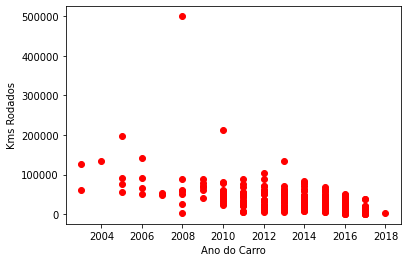

In [7]:
plt.scatter(df['ano'], df['kms_rodados'],  color='red')
plt.xlabel("Ano do Carro")
plt.ylabel("Kms Rodados")
plt.show()

Separando a variável dependente e as variáveis independentes

In [10]:
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [11]:
# escolhendo as variáveis independentes -> sem normalização de dados (TODO)
x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel', 'tipo_vendedor', 'tipo_transmissao', 'n_donos']]

In [12]:
# variável dependente
y = df[['preco_venda']]

### Separar dados em treino e teste

Para construir nosso modelo de Machine Learning precisamos dividir os dados em duas partes. Uma para treinar o modelo
e outra para testar o modelo com dados que ele não conhece. Para isso iremos separar 80% dos dados para treino e 20%
dos dados para teste. Para isso usaremos a biblioteca train_test_split que faz essa separação automaticamente.

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**x_train** é a parte usada para treinar o algoritmo

**x_test** é a parte usada para testar o algoritmo depois de treinado

**y_train** é a parte das respostas usadas no treino

**y_test** é a parte das respostas usadas para testar o algoritmo

In [14]:
# Vendo o número de registros que serão usados para o treino e teste
print('Treino')
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)

print('\nTeste')
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

Treino
x_train:  (240, 7)
y_train:  (240, 1)

Teste
x_test:  (61, 7)
y_test:  (61, 1)


### Treinando o Modelo

In [15]:
from sklearn.linear_model import LinearRegression

# define um modelo de regressão
model = LinearRegression()

# treina o modelo com os dados de treino
model.fit(x_train, y_train)

LinearRegression()

### Realiza a previsão dos preços

In [16]:
# y_pred contém a previsão dos preços do nosso modelo
y_pred = model.predict(x_test)

In [17]:
print(y_pred.shape)
print(y_test.shape)

(61, 1)
(61, 1)


Agora vamos plotar o preço dos carros, previsto pelo modelo versus os dados de teste

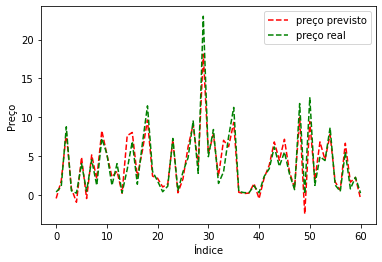

In [18]:
plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')

plt.show()

É possível observar no gráfico que o modelo, em alguns casos tende a prever preços mais baixos do que o preço real de venda.

Para saber o quanto o nosso modelo está explicando os dados, ou o quanto o modelo pode prever corretamente,
iremos utilizar a medida r2, que é o coeficiente de determinação. Para isso iremos utilizar os dados da resposta
na etapa de teste e os dados de resposta previstos.

In [19]:
from sklearn.metrics import r2_score

print('R2-score: ', r2_score(y_test, y_pred))

R2-score:  0.887403217276279


Quanto mais próximo de 1, mais o modelo é capaz de prever corretamente.
Então do resultado acima, colocando em porcentagem podemos dizer que o nosso modelo
prevê corretamente 87% dos preços.

### Agora é sua vez de Praticar

Use as variáveis a seguir para fazer as previsões com base no que já foi visto

In [20]:
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [23]:
new_x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel']]
new_y = df[['preco_venda']]

Separe os dados em dados de treino e teste, e então defina um modelo de regressão e realize as previsões.
depois use o r2_score para saber a nova porcentagem desse modelo. O resultado é melhor ou pior?

In [24]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_x, new_y, random_state=13, test_size=0.2)

In [25]:
new_model = LinearRegression()

new_model.fit(new_X_train, new_y_train)

LinearRegression()

In [27]:
new_preds = new_model.predict(new_X_test)
new_preds.shape

(61, 1)

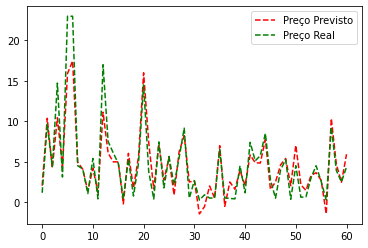

In [30]:
plt.plot(range(new_preds.shape[0]), new_preds, 'r--')
plt.plot(range(new_y_test.shape[0]), new_y_test, 'g--')
plt.legend(['Preço Previsto', 'Preço Real'])
plt.show()

In [32]:
r_2 = r2_score(new_y_test, new_preds)
r_2

0.8578565949438511

Portanto, o resultado da nova regressão é pior do que a anterior.

## Regressão com Normalização de Valores

Utilizaremos StandardScaler do scikit-learn para normalizar os valores dos dois casos e comparar seus valores de $R_2$.

Um valor, ou observação, $i$ que produz o valor de uma feature $x_i$ possui este mesmo valor normalizado como sendo o valor:

$$z_i = \frac{x_i - \mu_k}{\sigma_k}$$

onde $k$ é a k-ésima coluna que o valor $x_i$ pertence, $\mu_k$ é a média aritmética da mesma coluna e $\sigma$ o desvio padrão da mesma coluna.

Ou seja: o valor normalizado de uma célula em um dataframe é o valor subtraído da média aritmética dos valores numéricos da coluna, dividido pelo desvio padrão da mesma.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Standardization para o primeiro caso

In [45]:
standard_X_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns) 
standard_X_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [46]:
model.fit(standard_X_train, y_train)

LinearRegression()

In [47]:
predictions = model.predict(standard_X_test)

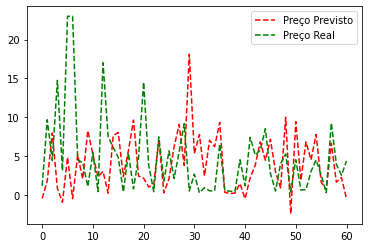

In [48]:
plt.plot(range(predictions.shape[0]), predictions, 'r--')
plt.plot(range(new_y_test.shape[0]), new_y_test, 'g--')
plt.legend(['Preço Previsto', 'Preço Real'])
plt.show()

In [49]:
r2 = r2_score(y_test, predictions)
print(r2)

0.8874032172762327


Para o primeiro caso, regularizar os valores tornou a grandeza $R_2$ praticamente a mesma que no primeiro caso, mudando apenas após várias casas decimais.

Assim, para este primeiro caso, a normalização dos valores entre [-1, 1] não resultou em mudanças significativas na acurácia do modelo.

## Standardization para o segundo caso

In [52]:
new_standard_X_train = pd.DataFrame(scaler.fit_transform(new_X_train), columns=new_X_train.columns) 
new_standard_X_test = pd.DataFrame(scaler.transform(new_X_test), columns=new_X_test.columns)

In [56]:
new_model.fit(new_standard_X_train, new_y_train)

LinearRegression()

In [57]:
new_predictions = new_model.predict(new_standard_X_test)

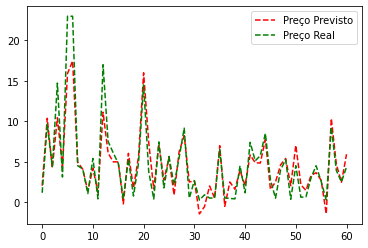

In [60]:
plt.plot(range(new_predictions.shape[0]), new_predictions, 'r--')
plt.plot(range(new_y_test.shape[0]), new_y_test, 'g--')
plt.legend(['Preço Previsto', 'Preço Real'])
plt.show()

In [61]:
r2 = r2_score(new_y_test, new_predictions)
print(r2)

0.8578565949439169


O último valor de $R_2$ resultou no menor de todos. No entanto, creio que seja o valor mais buscado, pois ele resulta de um modelo com dados de teste suficientemente grandes e com valores normalizados, além de features que parecem importar mais para a precificação de um carro. Desta forma, creio que este último modelo tenha satisfeito mais a ideia geral de um modelo de ML, generalização do resultado, o que significa predições a partir dos coeficientes de regressão mais confiáveis e mais bem treinadas para diversas situações.